## PUBG Game Analysis and Prediction 
### Anshul Sharma(as10950) & Srishti Patel (sp4917)

### Target Variables: Kills and Walk Distance
### Models Used -  Linear Regression, Decision Tree Regressor, Random Forest Regressor and Neural Network


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('dataset.csv')

In [162]:
# Print top 10 values
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [163]:
# Data types information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [164]:
df.shape

(4446966, 29)

### 1 . Data Cleaning

#### 1 a) Checking null Values

In [165]:
# Displaying dataframe summary showing nan, distinct, mean, max and min for all columns
def getDfSummary(input_data):
    # Place your code here
    describe,output_data = input_data.describe().T,pd.DataFrame() 
    rows,columns = [input_data.isnull().sum(axis = 0), input_data.nunique(dropna=True), describe['mean'], describe['max'], describe['min'], 
              describe['std'], describe['25%'], describe['50%'], describe['75%']],['number_nan','number_distinct','mean','max','min','std','25%','50%','75%']
    for i in range(0,len(columns)):
        output_data[columns[i]] = rows[i]
    return output_data

getDfSummary(df)

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
Id,0,4446966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groupId,0,2026745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matchId,0,47965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,0,20,0.233815,22.0,0.0,0.588573,0.0,0.0000,0.000000
boosts,0,27,1.106908,33.0,0.0,1.715794,0.0,0.0000,2.000000
damageDealt,0,29916,130.717138,6616.0,0.0,170.780621,0.0,84.2400,186.000000
DBNOs,0,39,0.657876,53.0,0.0,1.145743,0.0,0.0000,1.000000
headshotKills,0,34,0.226820,64.0,0.0,0.602155,0.0,0.0000,0.000000
heals,0,63,1.370147,80.0,0.0,2.679982,0.0,0.0000,2.000000
killPlace,0,101,47.599350,101.0,1.0,27.462937,24.0,47.0000,71.000000


#### Since there is only one row with null value, we are deleting that row as replacing it with zero doesn't make any sense here.

In [166]:
# Dropping the row with null values
df=df.dropna()

#### 1. b)Removing Outliers

In [167]:
#1.kills if distance 0 - is invalid

df['cheatkills'] = ((df['kills'] > 0) & (df['walkDistance'] + df['rideDistance'] + df['swimDistance'] == 0))
display(df[df['cheatkills'] == True].shape)
df.drop(df[df['cheatkills'] == True].index, inplace=True) 

#2.Anomalies in walk distance
display(df[df['walkDistance'] >= 10000].shape)
df.drop(df[df['walkDistance'] >= 10000].index, inplace=True)

#3.Anomalies in ride distance
display(df[df['rideDistance'] >= 20000].shape)
df.drop(df[df['rideDistance'] >= 20000].index, inplace=True)

#4.40 or more healing items used
display(df[df['heals'] >= 40].shape)
df.drop(df[df['heals'] >= 40].index, inplace=True)

#5. Anomalies in longest kill
display(df[df['longestKill'] >= 1000].shape)
df.drop(df[df['longestKill'] >= 1000].index, inplace=True)


(1535, 30)

(219, 30)

(150, 30)

(135, 30)

(20, 30)

In [168]:
df = df.drop(['cheatkills'], axis=1)

### 2. Data Preparation

### 2. a) Labelling features with alphabetical values to integer values

##### MatchType is Alphabetical value which is labelled to integer value.

In [117]:
# Label encoding match types with integer values (0-15)
nodes = list(set(df['matchType']))
nodes_dict = dict(zip(nodes, range(len(nodes))))
df = df.applymap(lambda x: nodes_dict.get(x) if x in nodes_dict else x)
nodes = list(set(df['matchType']))
getDfSummary(df)


,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
Id,0,181858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groupId,0,168494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matchId,0,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,0,5,0.055626,4.00,0.0,0.245172,0.0000,0.0000,0.0000
boosts,0,21,1.065606,24.00,0.0,1.824676,0.0000,0.0000,2.0000
damageDealt,0,16093,112.624464,2490.00,0.0,159.194126,0.0000,65.7500,159.7000
DBNOs,0,1,0.000000,0.00,0.0,0.000000,0.0000,0.0000,0.0000
headshotKills,0,19,0.223806,19.00,0.0,0.635202,0.0000,0.0000,0.0000
heals,0,40,1.008947,39.00,0.0,2.420069,0.0000,0.0000,1.0000
killPlace,0,100,46.175862,100.00,1.0,28.006803,21.0000,46.0000,70.0000


### 2. b) Combining Features to calculate totalDistance 

In [118]:
df['totalDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']

### 3. Data Correlation - Heatmap to show correlation between different features

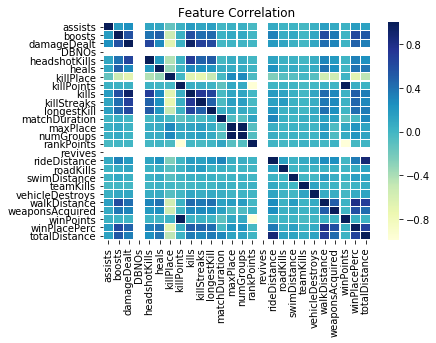

In [119]:
# Dropping features which are not important
drop_cols = ['Id', 'groupId', 'matchId', 'matchType']
corr_cols = [col for col in df.columns if col not in drop_cols]
corr = df[corr_cols].corr()
# Plotting heatmap to see correlation
plt.figure(figsize=(6,4))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="YlGnBu"
)
plt.title('Feature Correlation')
plt.show()

##  A. Target Variable 1 -  Kills

### A4. Feature Selection 

### Finding top correlations with the target variable 

In [120]:
# finding top 5 correlation with Kills(#1 Target Varible)
df1=df
top_ten = corr.nlargest(10,'kills')
top_ten = top_ten['kills']
top_ten= top_ten.to_frame()
top_ten = top_ten.drop(['kills'])
top_ten

,kills
damageDealt,0.930288
killStreaks,0.730193
headshotKills,0.697958
longestKill,0.657354
boosts,0.594151
winPlacePerc,0.500187
walkDistance,0.442285
totalDistance,0.353467
weaponsAcquired,0.299651


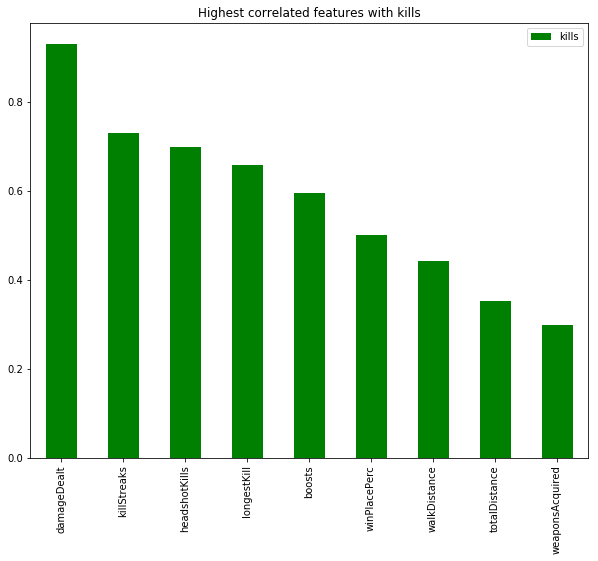

In [121]:
# Highest correlated features with Kills
top_ten.plot(kind='bar', stacked=True, color=tuple(["g"]), title = "Highest correlated features with kills", figsize = (10,8))

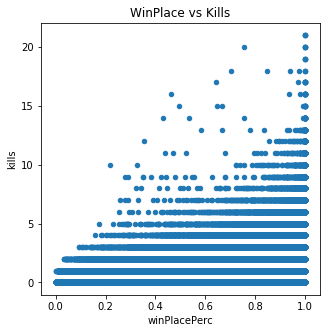

In [122]:
# correlation winPlacePerc vs kills
df.plot(x="winPlacePerc",y="kills", kind="scatter", figsize = (5,5), title = "WinPlace vs Kills")

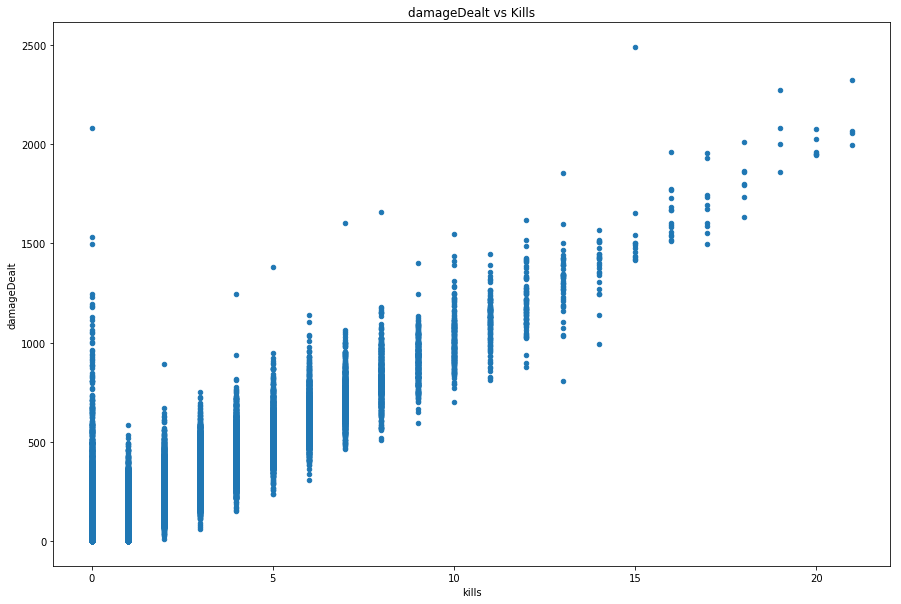

In [123]:
# correlation kills vs damagedealt
df.plot(x="kills",y="damageDealt", kind="scatter", figsize = (15,10), title = "damageDealt vs Kills")

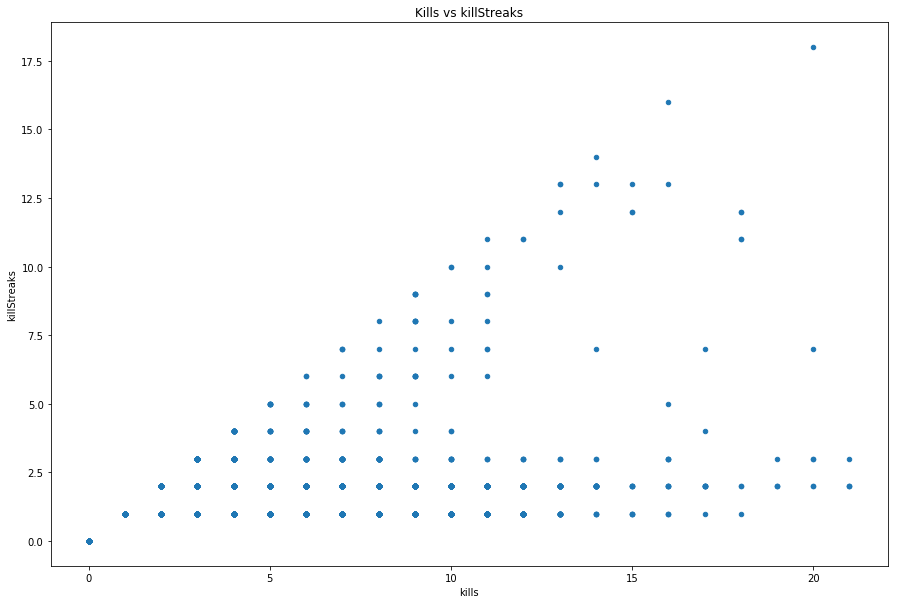

In [124]:
df.plot(x="kills",y="killStreaks", kind="scatter", figsize = (15,10), title = "Kills vs killStreaks")

## Test and Train Split Data

In [125]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

# Converting float to integer to treat continuous error
lab_enc = preprocessing.LabelEncoder()
walkDistance = lab_enc.fit_transform(df.walkDistance)

X = df[['damageDealt','killStreaks','headshotKills','boosts','longestKill','weaponsAcquired','winPlacePerc','walkDistance']]
Y = df['kills']
# test/train split with 80% and 20%
train_data,test_data, train_target,test_target = train_test_split(X, Y, train_size=0.8)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


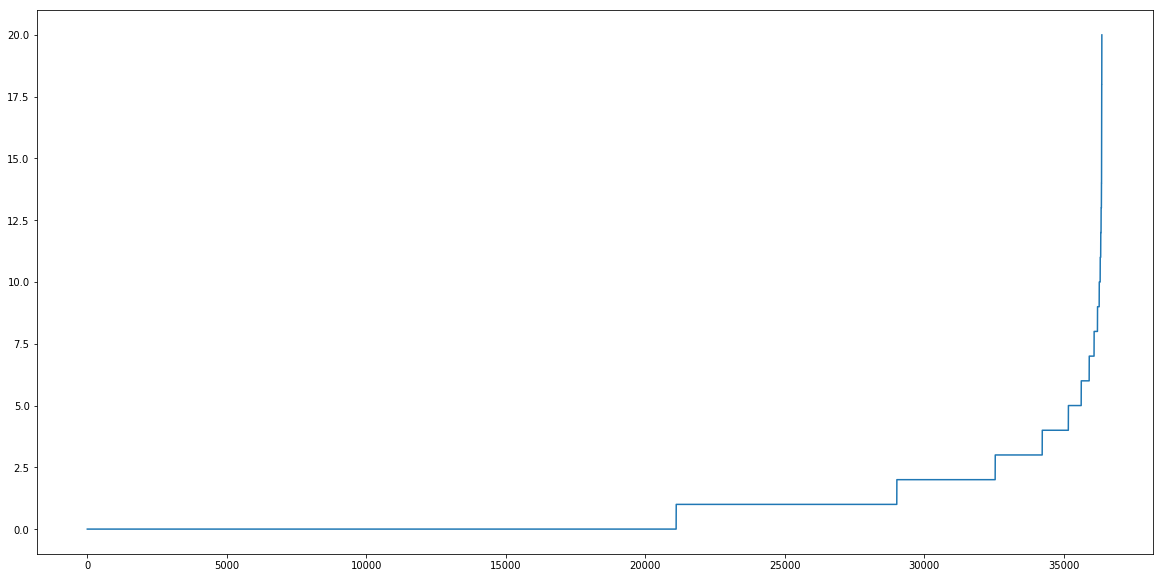

In [126]:
from matplotlib import pyplot
target1 = sorted(test_target)
plt.plot(target1)

## A5. Models

### A5 1). Linear Regression - Kills

In [127]:
from sklearn.linear_model import LinearRegression
# Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Model Evaluation

In [128]:
from sklearn.metrics import mean_absolute_error

y_pred_train1 = linear_regression_model.predict(train_data)
# Predicting the values in testing set
y_pred_test1 = linear_regression_model.predict(test_data)
# Calculating mae metric
accuracy_train1 = mean_absolute_error(train_target,y_pred_train1)
accuracy_test1 = mean_absolute_error(test_target,y_pred_test1)

print("MAE on training data is", accuracy_train1)
print("MAE on testing data is", accuracy_test1)
# Calculating score
score_train1 = linear_regression_model.score(train_data,train_target)
score_test1 = linear_regression_model.score(test_data,test_target)

print("Score on training data is", score_train1)
print("Score on testing data is", score_test1)

MAE on training data is 0.2992562324265431
MAE on testing data is 0.2992716517730461
Score on training data is 0.9040708254222429
Score on testing data is 0.9031611547743253


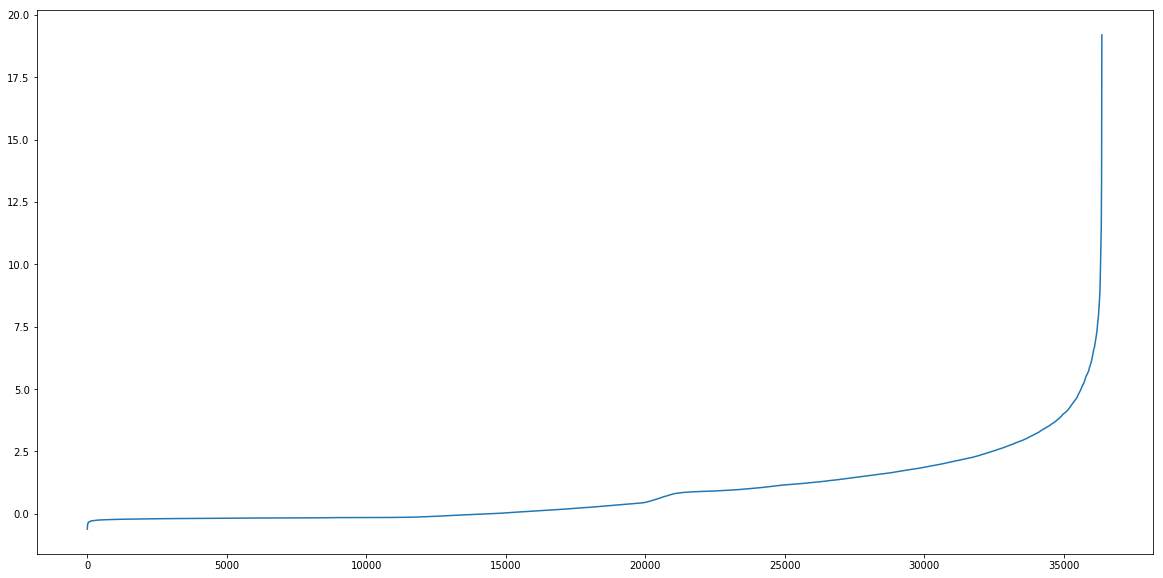

In [129]:
# Linear regression prediction result
target1_lr = sorted(y_pred_test1)
plt.plot(target1_lr)

### A5 2). Decision Tree Regressor - Kills

In [24]:
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split 

# df = df.head(50000)
# # Converting float to integer to treat continuous error
# lab_enc = preprocessing.LabelEncoder()
# totalDistance = lab_enc.fit_transform(df.totalDistance)

# X = df[['boosts','weaponsAcquired','damageDealt','heals','kills','longestKill','killStreaks','killPlace','winPlacePerc']]
# Y = totalDistance
# train_data,test_data, train_target,test_target = train_test_split(X, Y, train_size=0.8)
# # Testing and training

from sklearn.tree import DecisionTreeRegressor

# train_df=df.sample(frac=0.8,random_state=200)
# test_df = df.loc[~df.index.isin(train_df.index)]

decision_tree_regressor = DecisionTreeRegressor(criterion = 'mae')
# train_data,train_target = train_df[['boosts','weaponsAcquired','damageDealt','heals','kills','longestKill','killStreaks','killPlace','winPlacePerc']],totalDistance
decision_tree_regressor.fit(train_data, train_target)


DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
from matplotlib import pyplot as plt

### Feature Importance with Decision Trees

<class 'pandas.core.frame.DataFrame'>


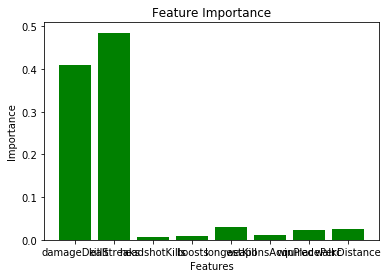

In [26]:
featurelength=np.arange(len(list(train_data)))
imp=pd.DataFrame({"Features":list(train_data),"Importance":decision_tree_regressor.feature_importances_})
# imp = sorted((dt_clf.feature_importances_), reverse = True)
print(type(imp))
# print(imp)

# print(imp.sort_values(by='Importance',ascending=False))
plt.bar(featurelength,imp["Importance"], color = "green")
plt.rcParams['figure.figsize']=(20,10)
plt.xticks(featurelength,imp["Features"])
plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [27]:
#Place your code here 
imp = imp.sort_values(by='Importance',ascending=False)
#print(imp)
#print('-'*100)
imp_cols = list(df[imp[:]["Features"]])
#imp_cols = cdf[list(imp['Features'][:3])]
# print(imp_cols)

imp_cols.extend(['totalDistance'])
corr_zoom = df[imp_cols].corr()
corr_zoom

,killStreaks,damageDealt,longestKill,walkDistance,winPlacePerc,weaponsAcquired,boosts,headshotKills,totalDistance
killStreaks,1.000000,0.673766,0.488016,0.370904,0.456914,0.287693,0.418840,0.482452,0.294719
damageDealt,0.673766,1.000000,0.623075,0.422350,0.482390,0.312377,0.576314,0.655541,0.344436
longestKill,0.488016,0.623075,1.000000,0.414281,0.419149,0.257248,0.447107,0.522429,0.358103
walkDistance,0.370904,0.422350,0.414281,1.000000,0.798872,0.502511,0.606528,0.306540,0.698809
winPlacePerc,0.456914,0.482390,0.419149,0.798872,1.000000,0.590437,0.626093,0.331508,0.666707
weaponsAcquired,0.287693,0.312377,0.257248,0.502511,0.590437,1.000000,0.377422,0.197794,0.439365
boosts,0.418840,0.576314,0.447107,0.606528,0.626093,0.377422,1.000000,0.400845,0.540657
headshotKills,0.482452,0.655541,0.522429,0.306540,0.331508,0.197794,0.400845,1.000000,0.245740
totalDistance,0.294719,0.344436,0.358103,0.698809,0.666707,0.439365,0.540657,0.245740,1.000000


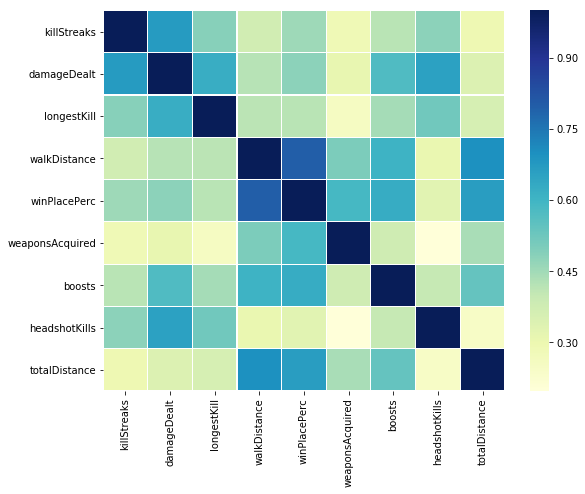

In [28]:
plt.figure(figsize=(9,7))
sns.heatmap(
    corr_zoom,
    xticklabels=corr_zoom.columns.values,
    yticklabels=corr_zoom.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="YlGnBu"
)
plt.show()

### Model EvaluationEvaluation Metric with Decision Trees

MAE on training data is 0.0
MAE on testing data is 0.1674639832838447
Score on training data is 1.0
Score on testing data is 0.8881674677864394


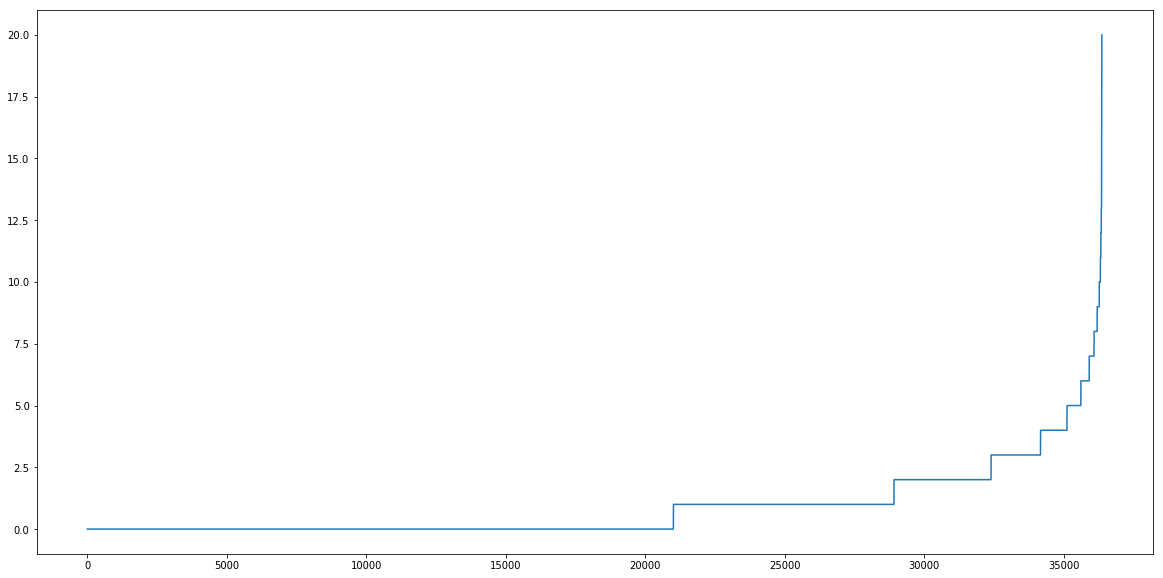

In [29]:
from sklearn.metrics import mean_absolute_error
y_pred_train = decision_tree_regressor.predict(train_data)

# x_t = test_data[list(train_data)]
# y_t = test_df['totalDistance']
y_pred_test = decision_tree_regressor.predict(test_data)
target1_dtf = sorted(y_pred_test)
plt.plot(target1_dtf)
# plt.plot(target1)

accuracy_train = mean_absolute_error(train_target,y_pred_train)
accuracy_test = mean_absolute_error(test_target,y_pred_test)

print("MAE on training data is", accuracy_train)
print("MAE on testing data is", accuracy_test)

score_train = decision_tree_regressor.score(train_data,train_target)
score_test = decision_tree_regressor.score(test_data,test_target)

print("Score on training data is", score_train)
print("Score on testing data is", score_test)

### A5) 3. Random Forest Regressor - Kills

In [130]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Function to print the MAE score
def print_score(m : RandomForestRegressor):
    val = m.predict(test_data)
    res1 = ['mae train: ', mean_absolute_error(m.predict(train_data), train_target)]
    res = ['mae test: ', mean_absolute_error(val, test_target)] 
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res1,res)
    return val

###  Model Evaluation 

In [131]:
m1 = RandomForestRegressor(n_estimators=300, min_samples_leaf=2, max_features='sqrt',
                          n_jobs=-1)
m1.fit(train_data,train_target)
val1 = print_score(m1)


['mae train: ', 0.07512747215467283] ['mae test: ', 0.13198485527932768]


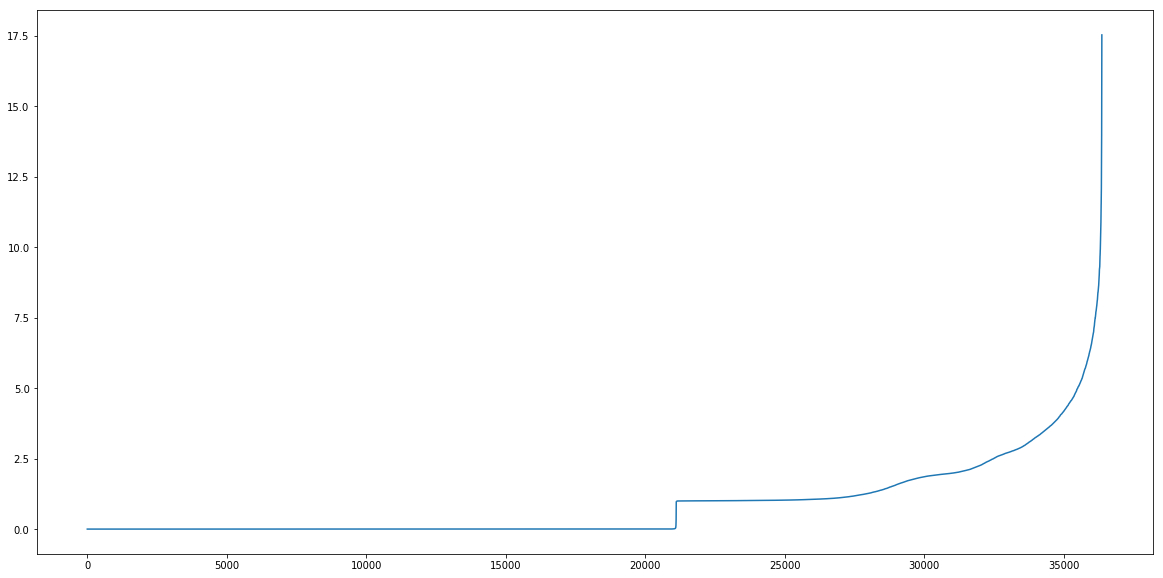

In [132]:
target1_rf = sorted(val1)
plt.plot(target1_rf)

### A5) 4. Running Neural Network - Kills

In [149]:
# Creating a model
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Running NN
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='elu'))
model.add(Dense(4, kernel_initializer='normal', activation='elu'))
model.add(Dense(2, kernel_initializer='normal', activation='elu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [151]:
model.fit(train_data,train_target,epochs=100,verbose=1)

Epoch 1/100
145486/145486 [==============================] - 8s 55us/step - loss: 0.1773
Epoch 2/100
145486/145486 [==============================] - 8s 55us/step - loss: 0.1716
Epoch 3/100
145486/145486 [==============================] - 8s 54us/step - loss: 0.1644
Epoch 4/100
145486/145486 [==============================] - 8s 54us/step - loss: 0.1573
Epoch 5/100
145486/145486 [==============================] - 8s 57us/step - loss: 0.1541: 
Epoch 6/100
145486/145486 [==============================] - 8s 56us/step - loss: 0.1511
Epoch 7/100
145486/145486 [==============================] - 8s 57us/step - loss: 0.1508
Epoch 8/100
145486/145486 [==============================] - 8s 56us/step - loss: 0.1504
Epoch 9/100
145486/145486 [==============================] - 8s 56us/step - loss: 0.1496
Epoch 10/100
145486/145486 [==============================] - 8s 55us/step - loss: 0.1485
Epoch 11/100
145486/145486 [==============================] - 8s 58us/step - loss: 0.1483: 0s - l
Epoch 12/

145486/145486 [==============================] - 11s 74us/step - loss: 0.1390
Epoch 91/100
145486/145486 [==============================] - 8s 56us/step - loss: 0.1394
Epoch 92/100
145486/145486 [==============================] - 7s 47us/step - loss: 0.1393
Epoch 93/100
145486/145486 [==============================] - 8s 58us/step - loss: 0.1389
Epoch 94/100
145486/145486 [==============================] - 8s 55us/step - loss: 0.1394
Epoch 95/100
145486/145486 [==============================] - 7s 50us/step - loss: 0.1392
Epoch 96/100
145486/145486 [==============================] - 10s 72us/step - loss: 0.1389
Epoch 97/100
145486/145486 [==============================] - 10s 70us/step - loss: 0.1389
Epoch 98/100
145486/145486 [==============================] - 9s 59us/step - loss: 0.1390
Epoch 99/100
145486/145486 [==============================] - 8s 57us/step - loss: 0.1395
Epoch 100/100
145486/145486 [==============================] - 7s 51us/step - loss: 0.1389


In [135]:
target1_nn = model.predict(test_data)

#### Model Evaluation

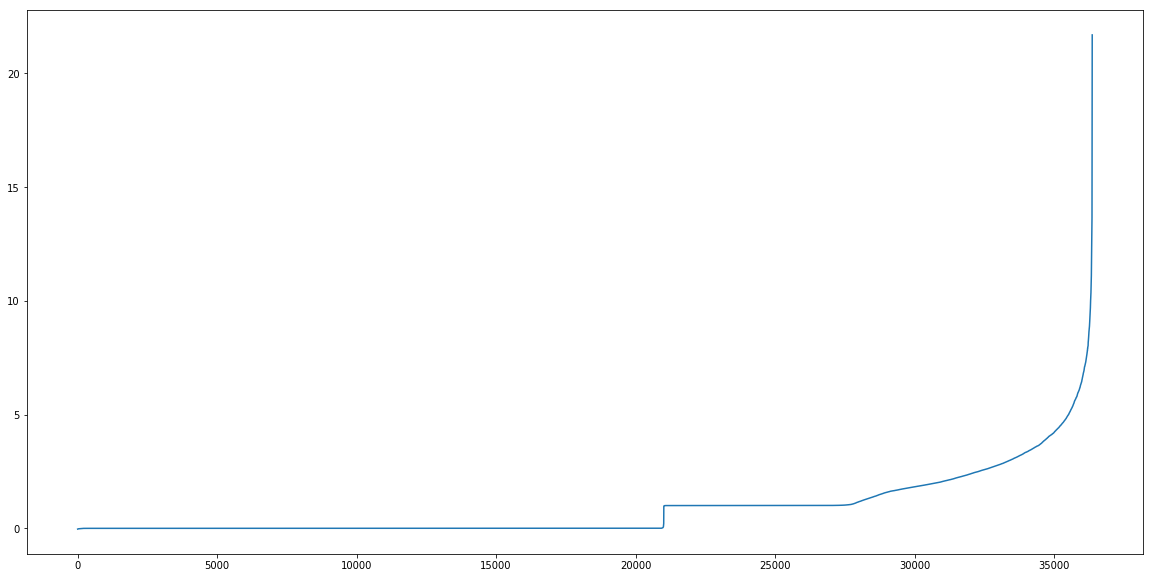

In [87]:
# Plotting prediction with Neural networks 
target1_nn = sorted(target1_nn)
plt.plot(target1_nn)

## A6. Model Comparison

### Visulaing model results with Actual Results -  Kills

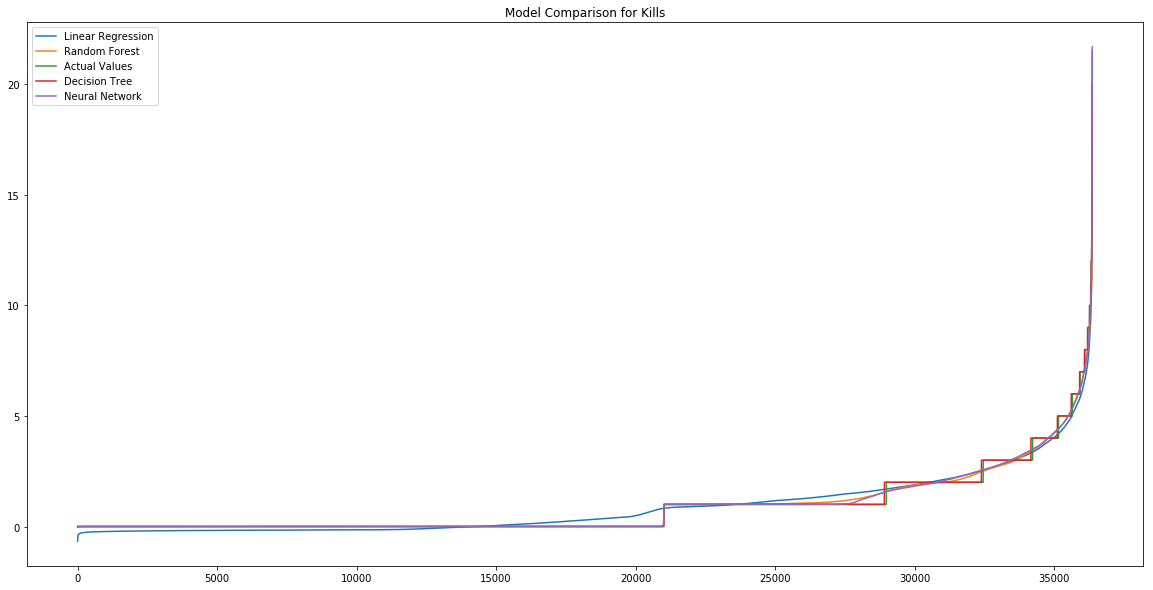

In [88]:
plt.plot(target1_lr, label = 'Linear Regression')
plt.plot(target1_rf, label = 'Random Forest')
plt.plot(target1, label = 'Actual Values')
plt.plot(target1_dtf, label = 'Decision Tree')
plt.plot(target1_nn, label = 'Neural Network')
plt.title("Model Comparison for Kills")
plt.legend()

## B . Target Variable 2 - walkDistance

In [39]:
# Removinf totalDistance as it would obviously have higher correlation with walkDistance as it is masde out of it.
df2 = df.drop(['totalDistance'], axis=1)
# df2 = df.drop(['swimDistance'], axis=1)
# df2 = df.drop(['rideDistance'], axis=1)

drop_cols = ['Id', 'groupId', 'matchId', 'matchType']
corr_cols = [col for col in df2.columns if col not in drop_cols]
corr1 = df2[corr_cols].corr()

### B 4. Feature Selection

In [40]:
# finding top 5 correlation withl winning
top_five = corr1.nlargest(10,'walkDistance')
top_five = top_five['walkDistance']
top_five = top_five.to_frame()
top_five

,walkDistance
walkDistance,1.000000
winPlacePerc,0.798872
boosts,0.606528
weaponsAcquired,0.502511
kills,0.442285
damageDealt,0.422350
longestKill,0.414281
heals,0.406449
killStreaks,0.370904
headshotKills,0.306540


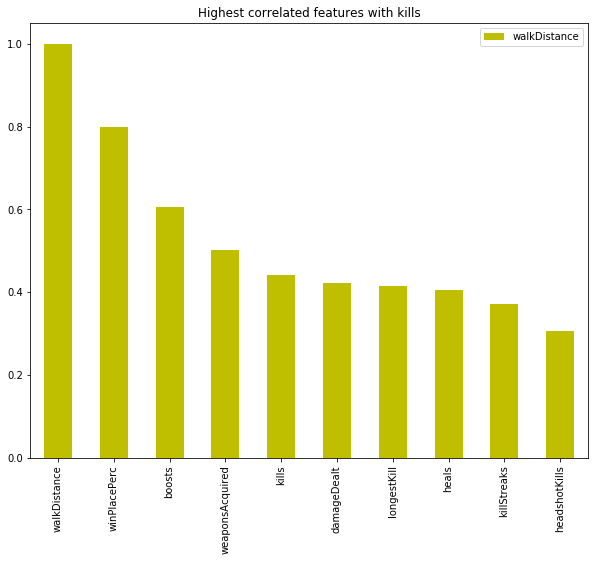

In [41]:
# Plotting top 5 correlated features 
top_five.plot(kind='bar', stacked=True, color=tuple(["y"]), title = "Highest correlated features with kills", figsize = (10,8))

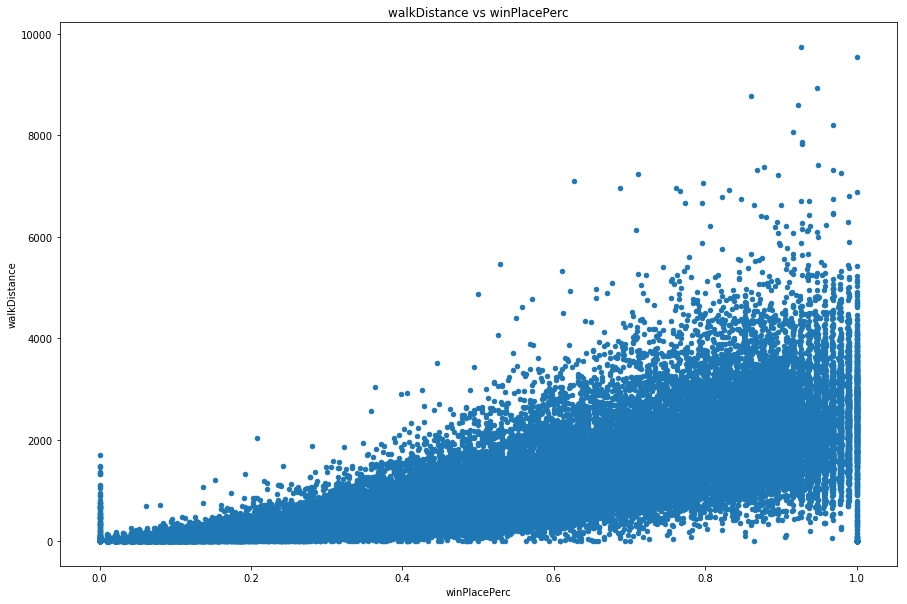

In [109]:
# winPlacePerc v/s walkDistance correlation
df2.plot(x="winPlacePerc",y="walkDistance", kind="scatter", figsize = (15,10), title = 'walkDistance vs winPlacePerc')

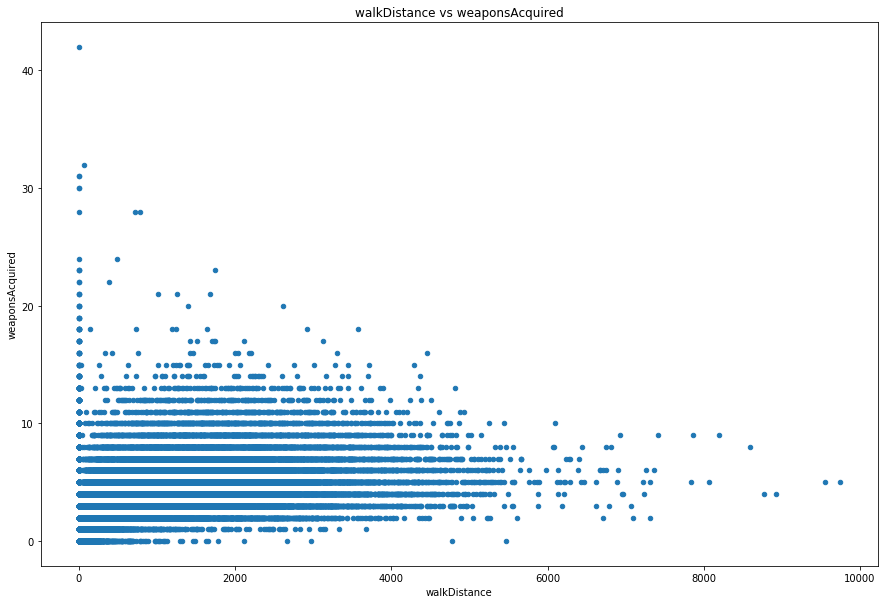

In [110]:
# winPlacePerc v/s weaponsAcquired correlation
df2.plot(x="walkDistance",y="weaponsAcquired", kind="scatter", figsize = (15,10),title = 'walkDistance vs weaponsAcquired')

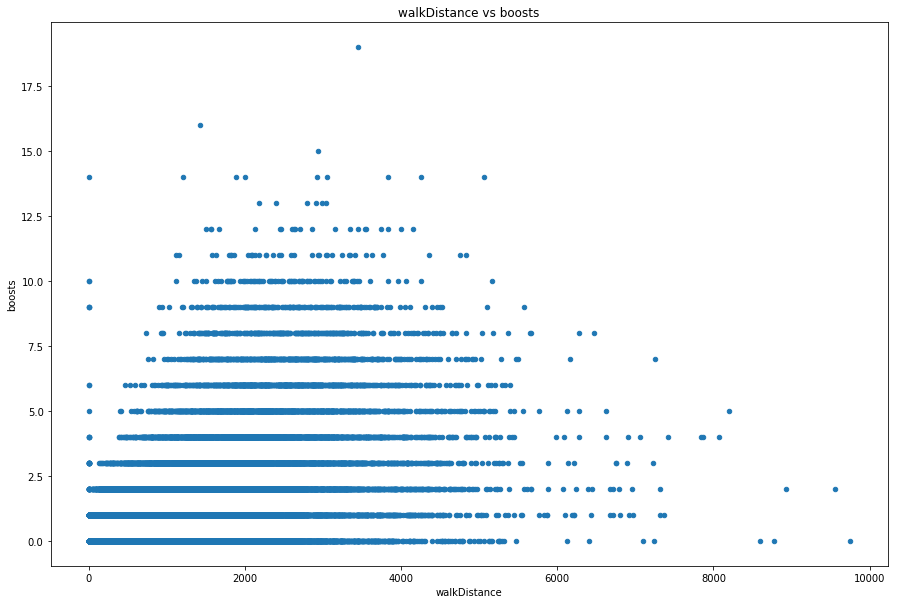

In [111]:
# winPlacePerc v/s boosts correlation
df2.plot(x="walkDistance",y="boosts", kind="scatter", figsize = (15,10), title = 'walkDistance vs boosts')

### Train Test Split - walkDistance

In [45]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

df2 = df2.head(50000)
# Converting float to integer to treat continuous error
lab_enc = preprocessing.LabelEncoder()
walkDistance = lab_enc.fit_transform(df.walkDistance)

X_walk = df2[['boosts','weaponsAcquired','damageDealt','heals','kills','longestKill','killStreaks','headshotKills','winPlacePerc']]
Y_walk = df2['walkDistance']
#  splitting test train with 80% and 20%
train_data_walk,test_data_walk, train_target_walk,test_target_walk = train_test_split(X_walk, Y_walk, train_size=0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


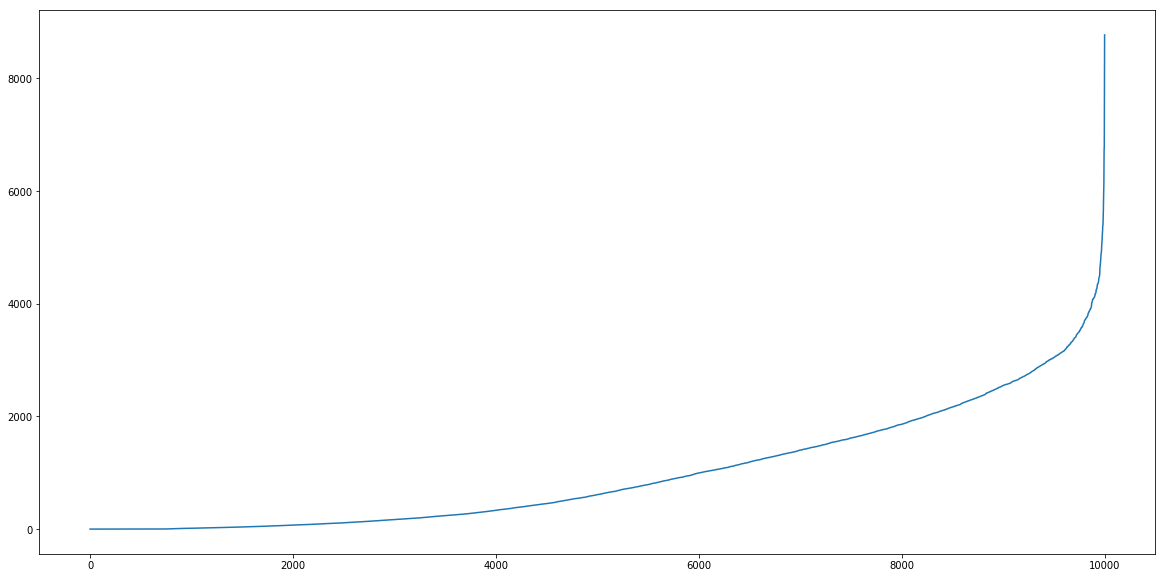

In [46]:
# Plotting the actual values of target(walkDistance) 
target2_plot = sorted(test_target_walk)
plt.plot(target2_plot)

### B 5. Models

### B 5)1. Linear Regression -walkDistance

In [153]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(n_jobs=100)
linear_regression_model.fit(train_data_walk, train_target_walk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=100, normalize=False)

In [154]:
from sklearn.metrics import mean_absolute_error
y_pred_train_walk = linear_regression_model.predict(train_data_walk)

# x_t = test_data[list(train_data)]
# y_t = test_df2['totalDistance']
y_pred_test_walk = linear_regression_model.predict(test_data_walk)

accuracy_train_walk = mean_absolute_error(train_target_walk,y_pred_train_walk)
accuracy_test_walk = mean_absolute_error(test_target_walk,y_pred_test_walk)

print("MAE on testing data is", accuracy_test_walk)

score_train1 = linear_regression_model.score(train_data_walk,train_target_walk)
score_test1 = linear_regression_model.score(test_data_walk,test_target_walk)

print("Score on testing data is", score_test1)

MAE on testing data is 409.4379865332284
Score on testing data is 0.6667876144058815


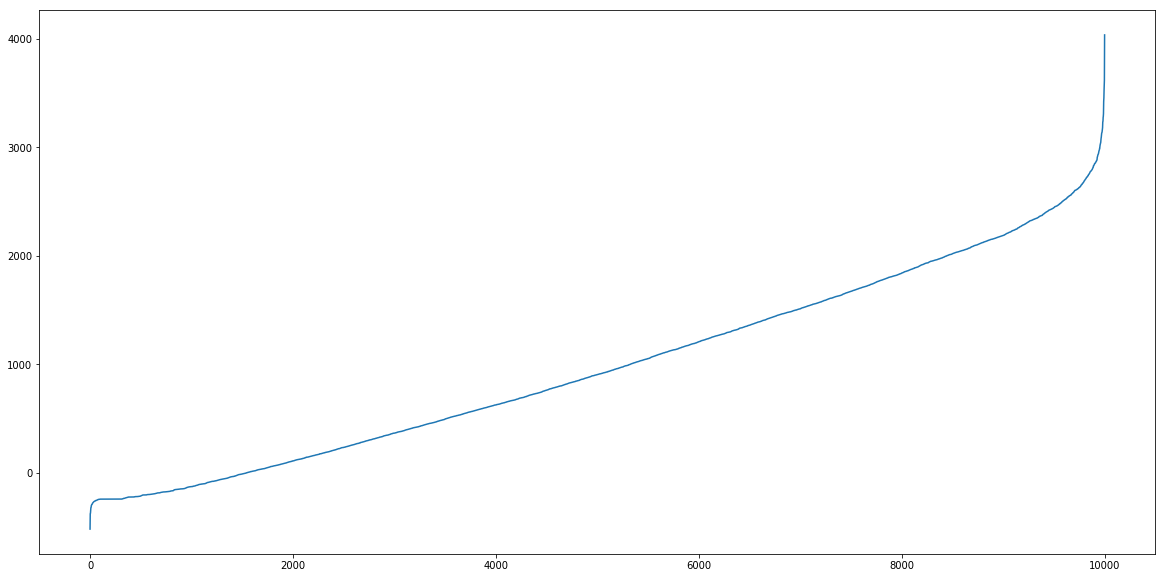

In [50]:
target2_lr = sorted(y_pred_test1)
plt.plot(target2_lr)

###  B 5) 3. Decision Tree Regressor - walkDistance

In [155]:
# Testing and training

from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor(criterion = 'mae',min_samples_leaf=12,min_samples_split=100)
decision_tree_regressor.fit(train_data_walk, train_target_walk)


DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=100, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [156]:
from matplotlib import pyplot as plt

<class 'pandas.core.frame.DataFrame'>


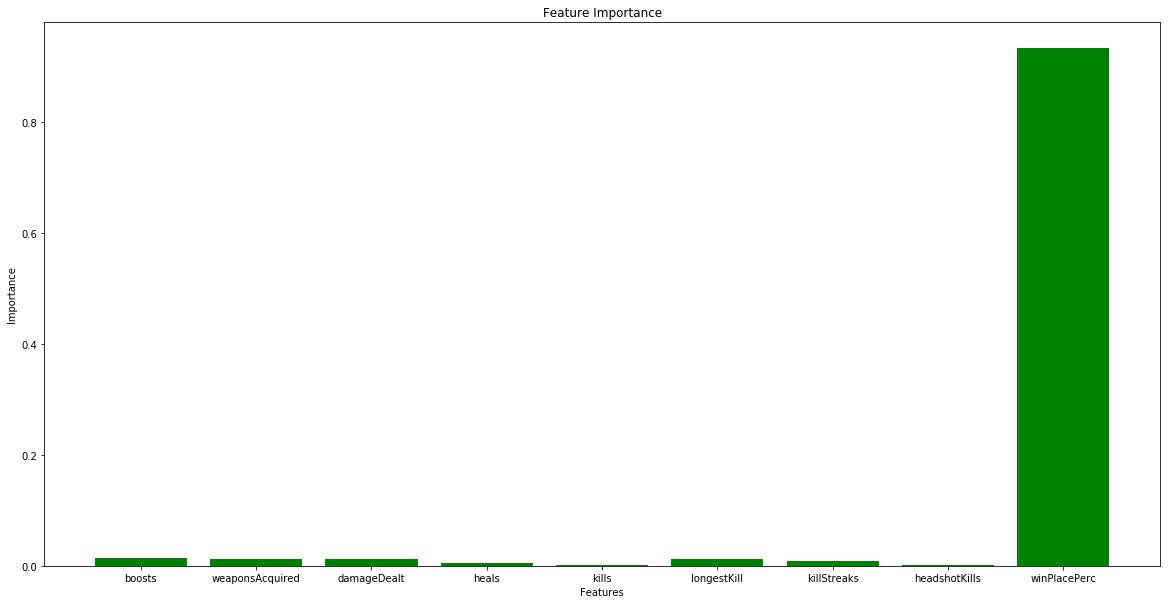

In [157]:
featurelength=np.arange(len(list(train_data_walk)))
imp=pd.DataFrame({"Features":list(train_data_walk),"Importance":decision_tree_regressor.feature_importances_})
# imp = sorted((dt_clf.feature_importances_), reverse = True)
print(type(imp))
# print(imp)
# print('-'*10)
# print(imp.sort_values(by='Importance',ascending=False))
plt.bar(featurelength,imp["Importance"], color = "green")
plt.rcParams['figure.figsize']=(20,10)
plt.xticks(featurelength,imp["Features"])
plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [158]:
#Place your code here 
imp = imp.sort_values(by='Importance',ascending=False)
#print(imp)
#print('-'*100)
imp_cols = list(df2[imp[:]["Features"]])
#imp_cols = cdf[list(imp['Features'][:3])]
# print(imp_cols)

imp_cols.extend(["walkDistance"])
corr_zoom = df2[imp_cols].corr()
corr_zoom

,winPlacePerc,boosts,longestKill,damageDealt,weaponsAcquired,killStreaks,heals,kills,headshotKills,walkDistance
winPlacePerc,1.000000,0.628748,0.416784,0.478307,0.585811,0.459021,0.399548,0.499748,0.332696,0.801036
boosts,0.628748,1.000000,0.442440,0.573529,0.373976,0.421540,0.486081,0.593476,0.399360,0.602961
longestKill,0.416784,0.442440,1.000000,0.618128,0.249728,0.494396,0.219458,0.655036,0.516392,0.407658
damageDealt,0.478307,0.573529,0.618128,1.000000,0.305850,0.673513,0.290606,0.928953,0.657433,0.417704
weaponsAcquired,0.585811,0.373976,0.249728,0.305850,1.000000,0.287209,0.251600,0.294132,0.194087,0.500109
killStreaks,0.459021,0.421540,0.494396,0.673513,0.287209,1.000000,0.250811,0.731956,0.478735,0.372298
heals,0.399548,0.486081,0.219458,0.290606,0.251600,0.250811,1.000000,0.294015,0.191152,0.410625
kills,0.499748,0.593476,0.655036,0.928953,0.294132,0.731956,0.294015,1.000000,0.697328,0.438463
headshotKills,0.332696,0.399360,0.516392,0.657433,0.194087,0.478735,0.191152,0.697328,1.000000,0.302862
walkDistance,0.801036,0.602961,0.407658,0.417704,0.500109,0.372298,0.410625,0.438463,0.302862,1.000000


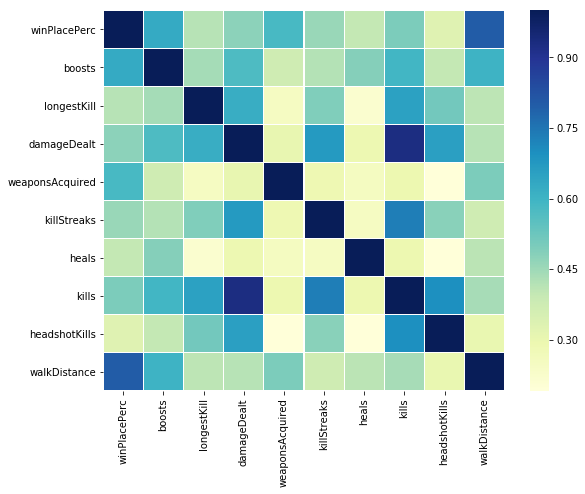

In [159]:
plt.figure(figsize=(9,7))
sns.heatmap(
    corr_zoom,
    xticklabels=corr_zoom.columns.values,
    yticklabels=corr_zoom.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="YlGnBu"
)
plt.show()

In [160]:
from sklearn.metrics import mean_absolute_error
y_pred_train_walk = decision_tree_regressor.predict(train_data_walk)

y_pred_test_walk = decision_tree_regressor.predict(test_data_walk)

accuracy_train_walk = mean_absolute_error(train_target_walk,y_pred_train_walk)
accuracy_test_walk = mean_absolute_error(test_target_walk,y_pred_test_walk)

print("MAE on testing data is", accuracy_test_walk)

score_train_walk = decision_tree_regressor.score(train_data_walk,train_target_walk)
score_test_walk = decision_tree_regressor.score(test_data_walk,test_target_walk)

print("Score on testing data is", score_test_walk)

MAE on testing data is 357.78747024
Score on testing data is 0.6811199932763361


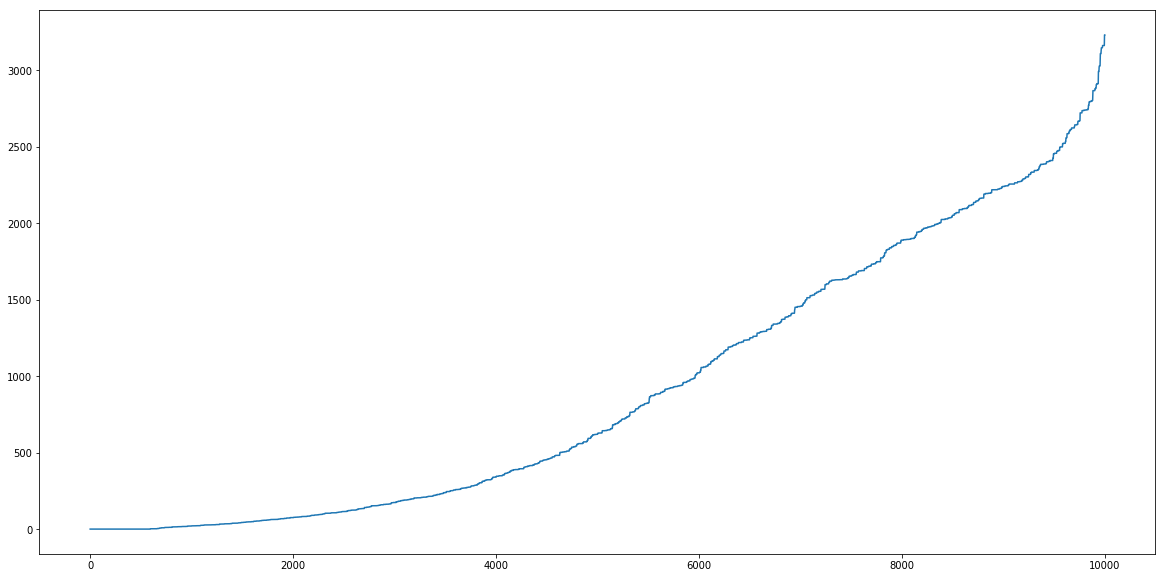

In [57]:
target2_dtf = sorted(y_pred_test_walk)
plt.plot(target2_dtf)

###  B 5) 3. Random Forest - walkDistance

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Function to print the MAE score
def print_score(m : RandomForestRegressor):
    val = m.predict(test_data_walk)
    res = ['mae train: ', mean_absolute_error(val, test_target_walk)] 
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    return val

In [59]:
m1 = RandomForestRegressor(n_estimators=600, min_samples_leaf=20,min_samples_split=50, max_features='sqrt',
                          n_jobs=-1)
m1.fit(train_data_walk,train_target_walk)
target2_rf = print_score(m1)
target2_rf = sorted(target2_rf)

['mae train: ', 353.05066765215963]


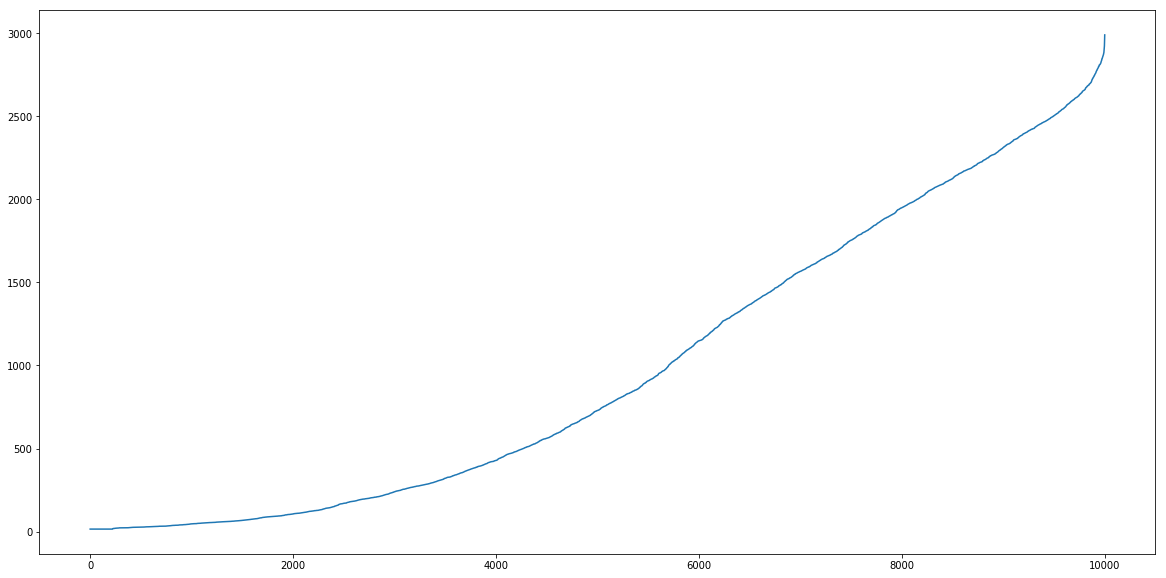

In [60]:
plt.plot(target2_rf)

###  B 5) 4. Neural Network Model -  walkDistance

In [139]:
# Creating a model
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Running NN
model = Sequential()
model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='softplus'))
model.add(Dense(4, kernel_initializer='normal', activation='softplus'))
model.add(Dense(2, kernel_initializer='normal', activation='softplus'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [146]:
model.fit(train_data_walk,train_target_walk,epochs=600,batch_size=40000)

Epoch 1/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7431
Epoch 2/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7071
Epoch 3/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6930
Epoch 4/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7861
Epoch 5/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7841
Epoch 6/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6973
Epoch 7/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7159
Epoch 8/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7487
Epoch 9/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7202
Epoch 10/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7089
Epoch 11/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7073
Epoch 12/600
40000/40000 [====

40000/40000 [==============================] - 0s 2us/step - loss: 352.7399
Epoch 94/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.8252
Epoch 95/600
40000/40000 [==============================] - 0s 2us/step - loss: 353.0507
Epoch 96/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7338
Epoch 97/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.8320
Epoch 98/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.8564
Epoch 99/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.8902
Epoch 100/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.8682
Epoch 101/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6960
Epoch 102/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7926
Epoch 103/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7894
Epoch 104/600
40000/40000 [===

40000/40000 [==============================] - 0s 2us/step - loss: 352.8156
Epoch 185/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6345
Epoch 186/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.8236
Epoch 187/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7584
Epoch 188/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6670
Epoch 189/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7068
Epoch 190/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7122
Epoch 191/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7575
Epoch 192/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6459
Epoch 193/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7503
Epoch 194/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7098
Epoch 195/600
40000/4000

40000/40000 [==============================] - 0s 2us/step - loss: 352.7357
Epoch 276/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6826
Epoch 277/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7392
Epoch 278/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7358
Epoch 279/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7153
Epoch 280/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7076
Epoch 281/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6799
Epoch 282/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7371
Epoch 283/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7448
Epoch 284/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6592
Epoch 285/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7235
Epoch 286/600
40000/4000

40000/40000 [==============================] - 0s 2us/step - loss: 352.6808
Epoch 366/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7910
Epoch 367/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7984
Epoch 368/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7136
Epoch 369/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7613
Epoch 370/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7081
Epoch 371/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6409
Epoch 372/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6605
Epoch 373/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7361
Epoch 374/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6513
Epoch 375/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6626
Epoch 376/600
40000/4000

40000/40000 [==============================] - 0s 2us/step - loss: 352.7257
Epoch 457/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.8093
Epoch 458/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6583
Epoch 459/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6804
Epoch 460/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7254
Epoch 461/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6780
Epoch 462/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7581
Epoch 463/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6754
Epoch 464/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7002
Epoch 465/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7217
Epoch 466/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.7227
Epoch 467/600
40000/4000

40000/40000 [==============================] - 0s 2us/step - loss: 352.6511
Epoch 548/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6222
Epoch 549/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6200
Epoch 550/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6301
Epoch 551/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6839
Epoch 552/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6512
Epoch 553/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6392
Epoch 554/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6763
Epoch 555/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6241
Epoch 556/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6379
Epoch 557/600
40000/40000 [==============================] - 0s 2us/step - loss: 352.6293
Epoch 558/600
40000/4000

In [104]:
target2_nn = model.predict(test_data_walk)

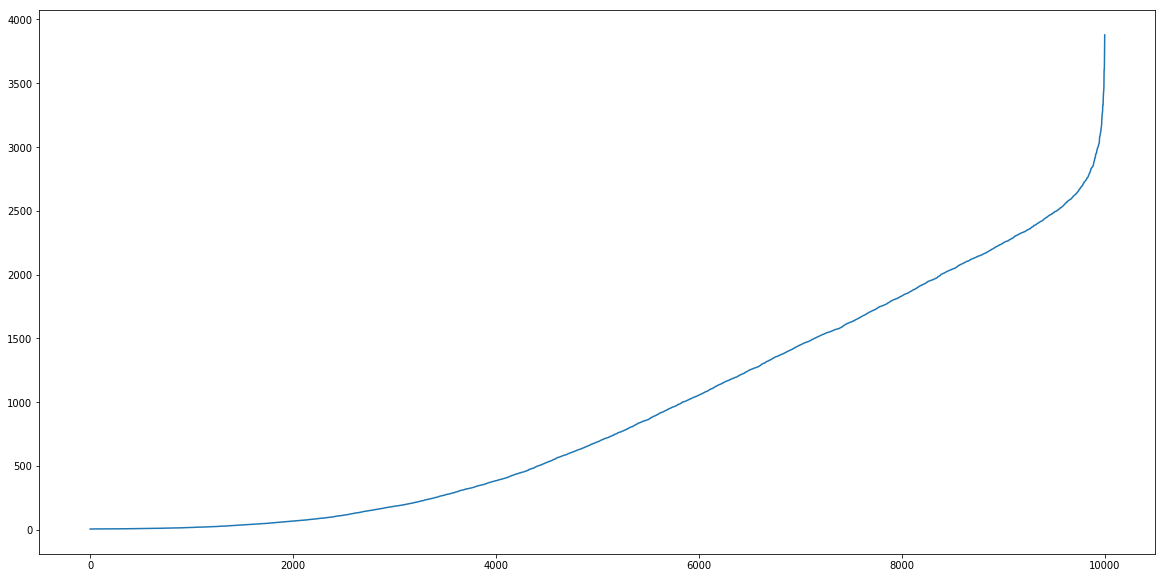

In [105]:
# Plotting predicted values
target2_nn = sorted(target2_nn)
plt.plot(target2_nn)

##  B 6) Model Comparison

### Visulaing model results with actual results -  WalkDistance

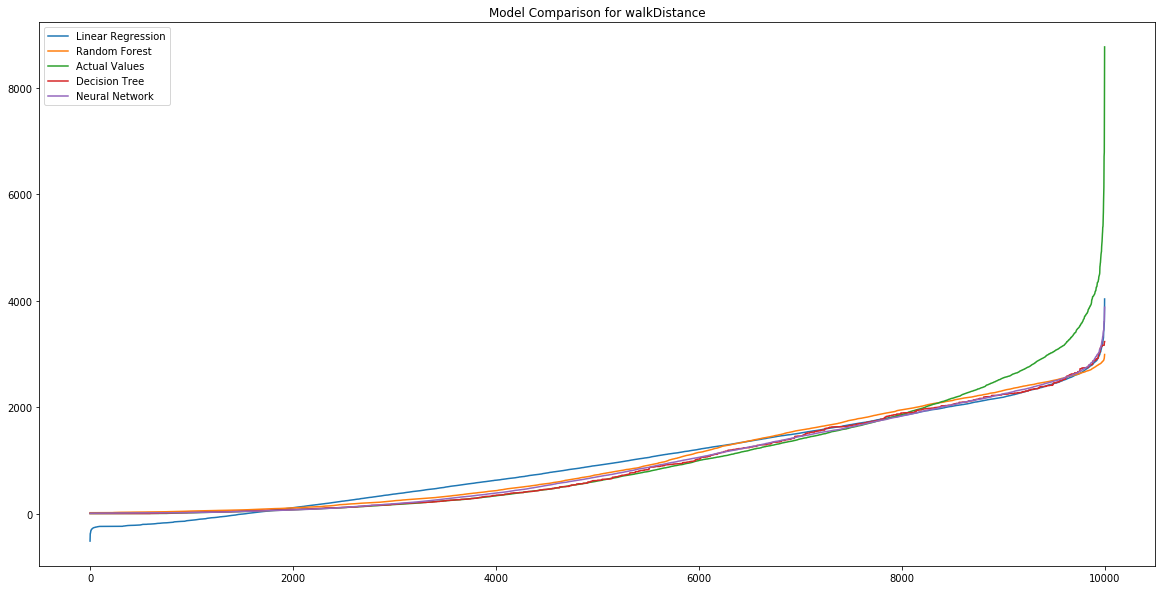

In [108]:
# Model comparison for predicted values with actual values
plt.plot(target2_lr, label = 'Linear Regression')
plt.plot(target2_rf, label = 'Random Forest')
plt.plot(target2_plot, label = 'Actual Values')
plt.plot(target2_dtf, label = 'Decision Tree')
plt.plot(target2_nn,label = 'Neural Network')
plt.title("Model Comparison for walkDistance")
plt.legend()